A2 de Linguagens de Programação – 26/11/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Lucas Emanuel Resck Domingues
Olá, Lucas Emanuel Resck Domingues!
Bom trabalho!


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from collections import Counter
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,0 ponto):  

Utilizando Python + SQL, crie uma tabela "aluno" em banco de dados no sqlite que tenha os seguintes campos:

+ id 
+ nome
+ data_nascimento
+ matricula

Escolha os tipos de dados apropriados. O campo id é chave primária, e deve ser autoincrementável. 

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_using_autoincrement.htm  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [3]:
conn = sqlite3.connect('../../Dados/meudatabase.sqlite')
cur = conn.cursor()

In [4]:
cur.execute('''
CREATE TABLE aluno (
id INTEGER PRIMARY KEY AUTOINCREMENT,
nome VARCHAR(20) NOT NULL,
data_nascimento CHAR(10),
matricula CHAR(10)
);
''')

In [6]:
cur.execute('''
INSERT INTO aluno (
nome
)
VALUES (
"Lucas Emanuel"
);
''')

In [7]:
cur.execute('select * from aluno')
for r in cur.fetchall():
    print(r)

(1, 'Lucas Emanuel', None, None)


Questão 2 (1.5 ponto):  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos Python + SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [8]:
conn = sqlite3.connect('../../Dados/iris_database.sqlite')
cur = conn.cursor()

In [11]:
cur.execute('PRAGMA table_info(iris);')
for r in cur.fetchall():
    print(r)

(0, 'Id', 'INTEGER', 0, None, 1)
(1, 'SepalLengthCm', 'NUMERIC', 0, None, 0)
(2, 'SepalWidthCm', 'NUMERIC', 0, None, 0)
(3, 'PetalLengthCm', 'NUMERIC', 0, None, 0)
(4, 'PetalWidthCm', 'NUMERIC', 0, None, 0)
(5, 'Species', 'TEXT', 0, None, 0)


In [14]:
#a)
cur.execute('select count(distinct(Species)) from iris')
for r in cur.fetchall():
    print(r)

(3,)


In [16]:
#b)
cur.execute('select count(*) from iris')
for r in cur.fetchall():
    print(r)

(150,)


In [23]:
#c)
cur.execute('''
select Species, avg(PetalLengthCm * PetalWidthCm) from iris group by Species order by avg(PetalLengthCm * PetalWidthCm) desc limit 1;
''')
for r in cur.fetchall():
    print(r)

('Iris-virginica', 11.296199999999994)


In [32]:
#d)
cur.execute('''
select Species, avg((SepalLengthCm * SepalWidthCm) + (PetalLengthCm * PetalWidthCm)) as Media from iris group by Species order by Media desc limit 1;
''')
for r in cur.fetchall():
    print(r)

('Iris-virginica', 30.9808)


Questão 3 (1.5 pontos):  

Importe o arquivo ../../Dados/votesurvey.xls para um dataframe do Python usando o método apropriado, e responda às questões:  

a) Exiba as 15 primeiras linhas (essa é muito fácil!).  
b) Qual a média de salário desejado, dentre os eleitores de cada presidente?  
c) Qual fator tem maior influência sobre o salário atual? Sexo ou Idade?  
d) Crie uma nova coluna no dataframe original que exiba o salário atual dividido pela idade.  

In [34]:
#a)
votesurvey = pd.read_excel('../../Dados/votesurvey.xls')
votesurvey[:15]

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush
9,Male,26,120000,80000,Bush


In [54]:
#b)
mediaBush = np.average(votesurvey[votesurvey.Candidate == 'Bush'].loc[:, 'Expected salary'])
mediaGore = np.average(votesurvey[votesurvey.Candidate == 'Gore'].loc[:, 'Expected salary'])
print("Bush: {}; Gore: {}".format(mediaBush, mediaGore))

Bush: 111666.66666666667; Gore: 103055.55555555556


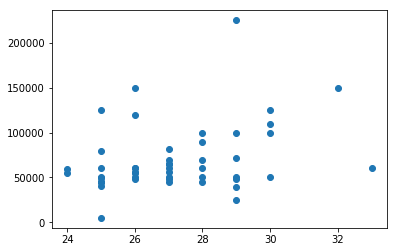

In [403]:
#c)
x1 = votesurvey.loc[:, 'Age']
y1 = votesurvey.loc[:, 'Salary before Stern']
plt.plot(x, y, 'o')
#ax2.plot(np.mean(votesurvey[votesurvey.loc[:, 'Gender'] == 'Female'].loc[:, 'Salary before Stern']), np.linspace(0, 2 * np.pi, 400))

plt.show()

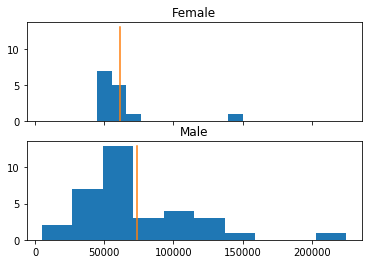

In [425]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex = True)
ax2.hist(votesurvey[votesurvey.loc[:, 'Gender'] == 'Female'].loc[:, 'Salary before Stern'])
x2 = np.mean(votesurvey[votesurvey.loc[:, 'Gender'] == 'Female'].loc[:, 'Salary before Stern'])
ax2.plot([x2, x2], [0, 13])
ax2.set_title('Female')
ax3.hist(votesurvey[votesurvey.loc[:, 'Gender'] == 'Male'].loc[:, 'Salary before Stern'])
x3 = np.mean(votesurvey[votesurvey.loc[:, 'Gender'] == 'Male'].loc[:, 'Salary before Stern'])
ax3.plot([x3, x3], [0, 13])
ax3.set_title('Male')
plt.show()

A regressão da idade aparenta ser significativa. Porém a de gênero deixa clara sua influência. Aparentemente, o gênero tem mais influência no salário atual.

In [108]:
#d)
salariopelaidade = pd.Series(votesurvey.loc[:, 'Salary before Stern'] / votesurvey.Age)
votesurvey['Salary divided by age'] = salariopelaidade
votesurvey[:10]

,Gender,Age,Salary before Stern,Expected salary,Candidate,Salary divided by age
0,Male,27,60000,110000,Bush,2222.222222
1,Male,30,125000,125000,Bush,4166.666667
2,Male,27,50000,120000,Bush,1851.851852
3,Male,26,56000,100000,Bush,2153.846154
4,Male,27,82000,100000,Bush,3037.037037
5,Male,32,150000,150000,Bush,4687.500000
6,Female,24,55000,100000,Bush,2291.666667
7,Male,30,110000,150000,Bush,3666.666667
8,Male,26,48000,80000,Bush,1846.153846
9,Male,26,120000,80000,Bush,4615.384615


Questão 4 (1.5 pontos): 

Transforme o arquivo ../../Dados/DomCasmurroMachadoAssis.txt em uma string no Python e responda, usando, quando possível, expressões regulares:  

a) Quais as 10 palavras mais frequentes que _começam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com letras _maiúsculas_ há no texto?  
c) Quantas palavras há no texto com apenas uma; com apenas duas; e com apenas 3 vogais?  

In [190]:
#a)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr [A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ] [a-záéíóúâêîôûàèìòùãõäëïöüç] > ../../Dados/DomCasmurroMachadoAssisMinusculas.txt
with open('../../Dados/DomCasmurroMachadoAssisMinusculas.txt', 'r') as arquivo:
    texto = arquivo.read()
    
texto = re.sub('[^a-záéíóúâêîôûàèìòùãõäëïöüç\-\']', ' ', texto)
palavras = texto.split()
palavras = [palavra.strip(string.punctuation) for palavra in palavras]

while '' in palavras:
    palavras.remove('')

palavrasA = [palavra for palavra in palavras if re.search(r'^[aáâàãõä]', palavra)]

palavrasAfreq = list(dict(Counter(palavrasA)).items())

palavrasAmais = sorted(palavrasAfreq, key = lambda x: x[1], reverse = True)
palavrasAmais[:11]

[('a', 2575),
 ('as', 548),
 ('ao', 374),
 ('á', 262),
 ('assim', 158),
 ('agora', 146),
 ('ainda', 141),
 ('até', 102),
 ('aos', 89),
 ('aqui', 87),
 ('antes', 87)]

In [194]:
#b)
with open('../../Dados/DomCasmurroMachadoAssis.txt', 'r') as arquivo:
    texto1 = arquivo.read()
    
texto1 = re.sub('[^A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇa-záéíóúâêîôûàèìòùãõäëïöüç\-\']', ' ', texto1)

palavras1 = texto1.split()
palavras1 = [palavra.strip(string.punctuation) for palavra in palavras1]

palavrasMaiusculas = [palavra for palavra in palavras1 if re.search(r'^[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]', palavra)]
palavrasMaiusculas = [palavra.upper() for palavra in palavrasMaiusculas]
palavrasMaiusculas = set(palavrasMaiusculas)
len(palavrasMaiusculas)

1558

In [199]:
#c)
umavogal = [palavra for palavra in palavras if re.search(r'^[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*$', palavra)]
duasvogais = [palavra for palavra in palavras if re.search(r'^[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*$', palavra)]
tresvogais = [palavra for palavra in palavras if re.search(r'^[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*[aeiouáéíóúâêîôûàèìòùãõäëïöü]{1}[^aeiouáéíóúâêîôûàèìòùãõäëïöü]*$', palavra)]
print('Uma vogal: {}; duas vogais: {}; três vogais: {}'.format(len(umavogal), len(duasvogais), len(tresvogais)))

Uma vogal: 21870; duas vogais: 24440; três vogais: 13230


Questão 5 (1.5 pontos):    

Utilizando apenas o Shell Linux, e utilizando o arquivo ../../Dados/DomCasmurroMachadoAssis.txt, diga os comandos para responder às seguintes perguntas:  

a) Quais as 10 palavras mais frequentes que _terminam_ com "a" ou "A"?  
b) Quantas palavras distintas que começam com _minúsculas_ há no texto?   
c) Como ordenar as palavras distintas por ordem de "rima"?  

In [228]:
#a)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr '[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]' '[a-záéíóúâêîôûàèìòùãõäëïöüç]' | tr -sc "[a-záéíóúâêîôûàèìòùãõäëïöüç\-\']" '[\012*]' | sort | grep '^.*[aáâàãä]\{1\}$' | uniq -c | sort -nr | sed -n '1,10p'

   2549 a
    629 da
    550 era
    539 para
    442 uma
    341 minha
    330 na
    261 á
    186 ella
    170 casa


In [229]:
#b)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr -sc "[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇa-záéíóúâêîôûàèìòùãõäëïöüç\-\']" '[\012*]' | grep '^[a-záéíóúâêîôûàèìòùãõäëïöüç]\{1\}.*$' | tr '[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]' '[a-záéíóúâêîôûàèìòùãõäëïöüç]' | sort | uniq | wc -l

9393


In [266]:
#c)
! cat ../../Dados/DomCasmurroMachadoAssis.txt | tr '[A-ZÁÉÍÓÚÂÊÎÔÛÀÈÌÒÙÃÕÄËÏÖÜÇ]' '[a-záéíóúâêîôûàèìòùãõäëïöüç]' | tr -sc "[a-záéíóúâêîôàèìòùãõäëïöüç\-\']" '[\012*]' | rev | sort | rev | uniq

rev: stdin: Invalid or incomplete multibyte or wide character
tr: write error: Broken pipe
tr: write error
tr: write error: Broken pipe
tr: write error
cat: write error: Broken pipe

]
a
á
graça
bibliotheca
da
alcunha
dia
academia
--já
uma
para
era
brazileira
moreira
outra
laura
leitura
anecdota
curta
vista
lua
rua
estava
marc
produced
extended
included
located
united
world
and
e
de
cidade
made
worldwide
póde
free
language
d'hooghe
vi-lhe
the
available
elle
title
me
chamam-me
alcunhando-me
recitando-me
comprimentou-me
online
anyone
pé
are
where
anywhere
before
literature
release
portuguese
license
interrompesse
mettesse
disse
use
re-use
sentou-se
date
noite
inteiramente
seguinte
--continue
que
rue
have
give
if
of
linking
using
gutenberg
org
h
with
i
acabei
fechei
encontrei
contei
zanguei
aqui
check
ebook
[ebook
afinal
nacional
educational
central
natal
digital
brasil
you'll
deram
gostam
em
viagem
nem
porém
trem
fossem
mim
assim
dom
um
an
in
version
education
soon
o
ao
não
--são
conheço

Questão 6 (2.0 ponto):  

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Leia para dataframes do Pandas as tabelas "invoices", "invoice_items", "customers" e "tracks"; e mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Crie um histograma de faixas ("tracks") mais compradas.  
c) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [277]:
#a)
conn = sqlite3.connect('../../Dados/chinook.sqlite')
invoices = pd.read_sql_query('select * from invoices', con = conn)
invoice_items = pd.read_sql_query('select * from invoice_items', con = conn)
customers = pd.read_sql_query('select * from customers', con = conn)
tracks = pd.read_sql_query('select * from tracks', con = conn)

In [307]:
join = pd.merge(pd.merge(pd.merge(invoice_items, tracks, on='TrackId', how='inner'), invoices, on = 'InvoiceId', how = 'inner'), customers, on = 'CustomerId', how = 'inner')

In [336]:
faixas = []
for index in join.index:
    if re.search(r'^[M]{1}.*$', join.FirstName[index]):
        faixas.append(join.Name[index])
faixas

['Right Through You',
 'Not The Doctor',
 'Bleed The Freak',
 'Confusion',
 'Por Causa De Você',
 'Angela',
 'Master Of Puppets',
 'Welcome Home (Sanitarium)',
 'Set It Off',
 "Whatever It Is, I Just Can't Stop",
 'Light Years',
 'Take It Or Leave It',
 "Say It Loud, I'm Black And I'm Proud Pt.1",
 "I'm Real",
 'Destitute Illusions',
 'Are You Gonna Be My Girl',
 'May This Be Love',
 'The Wind Cries Mary',
 'Lords of Karma',
 'Os Alquimistas Estão Chegando',
 'As Dores do Mundo',
 'Sem Sentido',
 'Equinocio',
 'Onde Anda Você',
 'Knockin On Heavens Door',
 'Wonderful Tonight',
 'Carouselambra',
 "I'm Gonna Crawl",
 'Rock & Roll',
 'Stairway To Heaven',
 'Endgame',
 'Country Feedback',
 'Talk About The Passion',
 'Green Grow The Rushes',
 'I Believe',
 "It's The End Of The World As We Know It (And I Feel Fine)",
 'Quanta (Live)',
 'Pela Internet (Live)',
 'Bowels Of The Devil',
 'Voodoo',
 'Body Count',
 'KKK Bitch',
 'Suite No. 3 in D, BWV 1068: III. Gavotte I & II',
 'Adios nonino',
 

In [346]:
#b)
invoice_items[invoice_items.Quantity != 1]
#Em invoice_items há as informações que preciso

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity


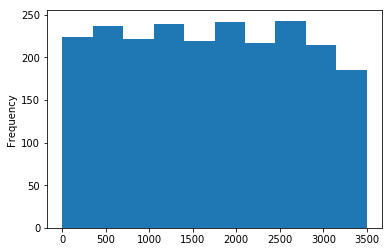

In [354]:
invoice_items.TrackId.plot(kind = 'hist')

In [395]:
#c)
cur.execute("SELECT artists.Name, albums.Title FROM albums JOIN artists where albums.ArtistId = artists.ArtistId;")
dicio = {}
for aa in cur.fetchall():
    if aa[0] not in dicio:
        dicio[aa[0]] = [aa[1]]
    else:
        dicio[aa[0]].append(aa[1])
dicio

{'AC/DC': ['For Those About To Rock We Salute You', 'Let There Be Rock'],
 'Aaron Copland & London Symphony Orchestra': ['A Copland Celebration, Vol. I'],
 'Aaron Goldberg': ['Worlds'],
 'Academy of St. Martin in the Fields & Sir Neville Marriner': ['The World of Classical Favourites'],
 'Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner': ['Sir Neville Marriner: A Celebration'],
 'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair': ['Fauré: Requiem, Ravel: Pavane & Others'],
 'Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart': ['Bach: Orchestral Suites Nos. 1 - 4'],
 'Accept': ['Balls to the Wall', 'Restless and Wild'],
 'Adrian Leaper & Doreen de Feis': ['Górecki: Symphony No. 3'],
 'Aerosmith': ['Big Ones'],
 'Aisha Duo': ['Quiet Songs'],
 'Alanis Morissette': ['Jagged Little Pill'],
 'Alberto Turco & Nova Schola Gregoriana': ['Adorate Deum: Gregorian Chant from the Proper of the Mass'],
 'Alice I

Auto-avaliação (1 ponto):    
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.    

### Escreva aqui

Acredito que eu poderia ter me empenhado mais, porém não muito além do que era requerido. Não prestei atenção em todas as aulas e dispersei em algumas delas. Levando em consideração o aproveitamento da disciplina, atribuo 0,9.
Sobre a avaliação da disciplina: acho que ela pode ser mais direta e mais metodológica, para que as aulas rendam mais. Além disso, acredito que eu preciso de mais silêncio durante as provas pra me concentrar... Fora isso, a disciplina tem a grande vantagem de ser descontraída e pouco rígida, evitando o estresse dos alunos.